In [1]:
#install and import dependancies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math

In [2]:
 #Load Data
 from google.colab import files
uploaded = files.upload()

Saving Customer_personality_analysis.csv to Customer_personality_analysis.csv


In [3]:
df = pd.read_csv('Customer_personality_analysis.csv', sep='\t')
df.head(5)

#separator here is the tabulation "\t"

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()
#3 kategorical, 26 numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T.style.background_gradient(cmap = "Blues")
#Zcost & Zrevenue punya std =0 

,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


In [6]:
df.shape

(2240, 29)

In [7]:
#cek null data
df.isnull().sum()
#income ada missing value 24, bisa di drop/replace with mean

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#cek for duplicated data
df.duplicated().sum()
#gkada data duplicate

0

In [9]:
#Fill null data
df["Income"].fillna(df["Income"].mean(), inplace=True)

In [10]:
#drop the column we dont need
df.drop('ID', axis=1, inplace=True)
df.drop('Z_CostContact', axis=1, inplace=True)
df.drop('Z_Revenue', axis=1, inplace=True)

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)
df.head()
#Parse the Dt_Costumer from object to datetime

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [12]:
# Categorical columns
categorical_col = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4',
                   'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain','Response']
df[categorical_col] = df[categorical_col].astype('object')


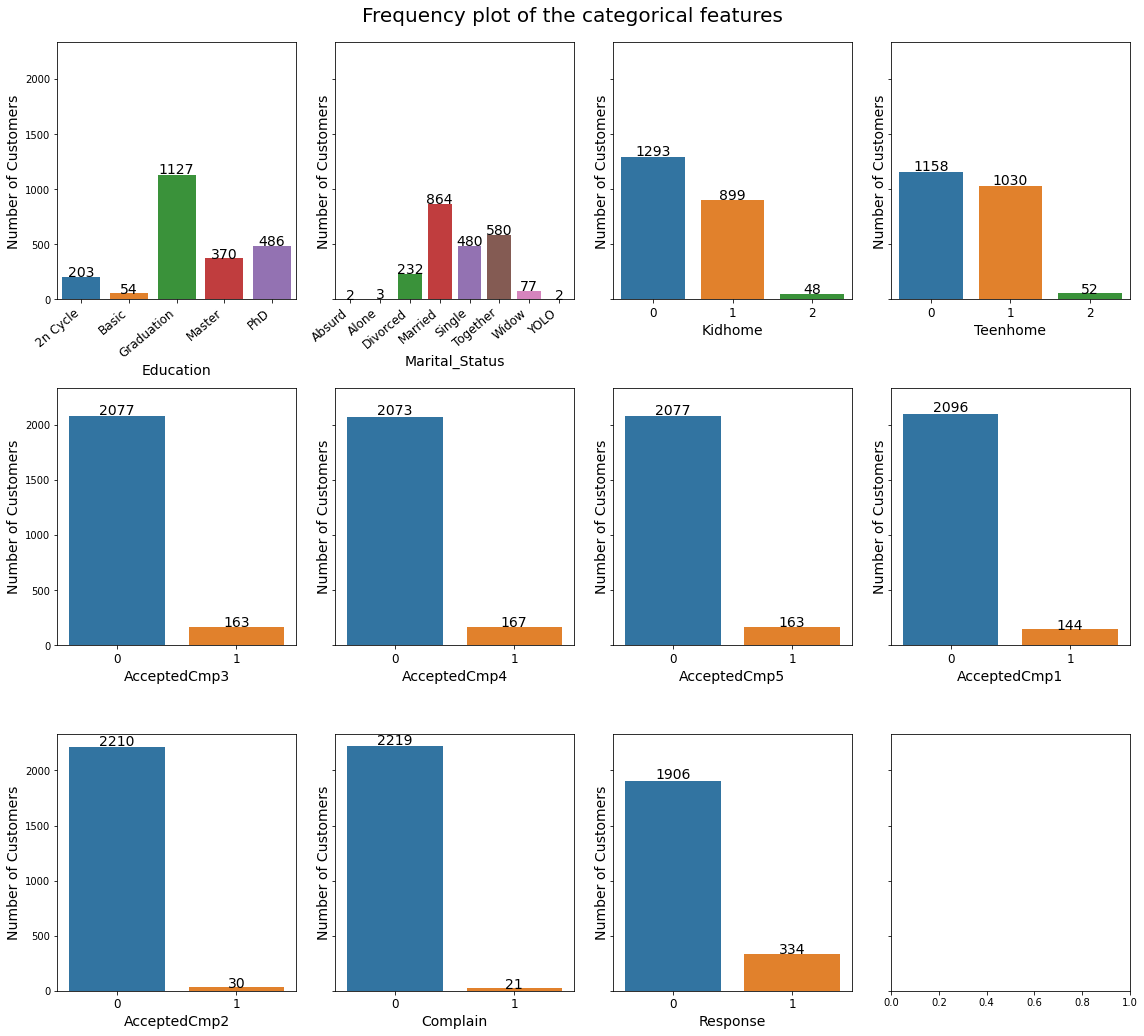

In [13]:
# Frequency count of each categorical variable
fig, ax=plt.subplots(3,4, figsize=(16,14), sharey=True)

for col, axis in zip(categorical_col, ax.ravel()):
    sns.countplot(x=col, data=df, ax=axis, order = np.sort(df[col].unique()))
    for i in axis.patches:    
        axis.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.01,
                s = f"{i.get_height()}", 
                ha = 'center', size = 14, rotation = 0, color = 'black')

    if (col == 'Marital_Status') or (col == 'Education'):
        axis.set_xticklabels(np.sort(df[col].unique()), rotation=40, ha="right", fontsize=12)
    else:
        axis.set_xticklabels(np.sort(df[col].unique()), fontsize=12)
    axis.set_ylabel('Number of Customers', fontsize=14);
    axis.set_xlabel(col, fontsize=14);

fig.text(0.5, 1.01, 'Frequency plot of the categorical features', ha = 'center', fontsize = 20)
plt.tight_layout()

#The count of 1's is very less compared to 0's, this can cause problem while clustering so it is better to remove these columns

In [14]:
df['Marital_Status'].value_counts()  
#bisa kita simpulkan jadi single & in relationship aja

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
df['Education'].value_counts() 
#bisa kita simpulin jadi Undergraduate dan Postgraduate aja

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

# Feature Engineering

In [16]:
#Simpulin marital status jadi single & in relationship aja
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
#group Married, Together asRelatiionship and grouping the rest as single

In [17]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')
#Changing category into UG and PG only

In [18]:
df['Age'] = 2022 - df["Year_Birth"]
## Finding age of the customer

In [19]:
#gabungin KidHome + Teen home jadi 1
# Total Children
df['Total_Children'] = df['Kidhome']+df['Teenhome']

In [20]:
# Columns to drop
df = df.drop(columns = ['AcceptedCmp2','Complain'])

In [21]:
# Number of relative days the cutomer is engaged with the company
earliest_customer = df['Dt_Customer'].max()
df['Engaged_days'] = df['Dt_Customer'].apply(lambda x: (earliest_customer - x).days)

In [22]:
# Dropping columns which are not required now

df = df.drop(['Dt_Customer','Year_Birth'], axis=1)


In [23]:
df = df.drop(['Kidhome','Teenhome'], axis=1)

In [24]:
# Create the Total_spent attribute : 
df['Total_spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [25]:
# Create reduction accepted : 

df['Promo_Accepted']= df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['Response']

In [26]:
df = df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1)

In [29]:
df = df.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','Response'], axis=1)

KeyError: ignored

In [30]:
df.shape

(2240, 14)

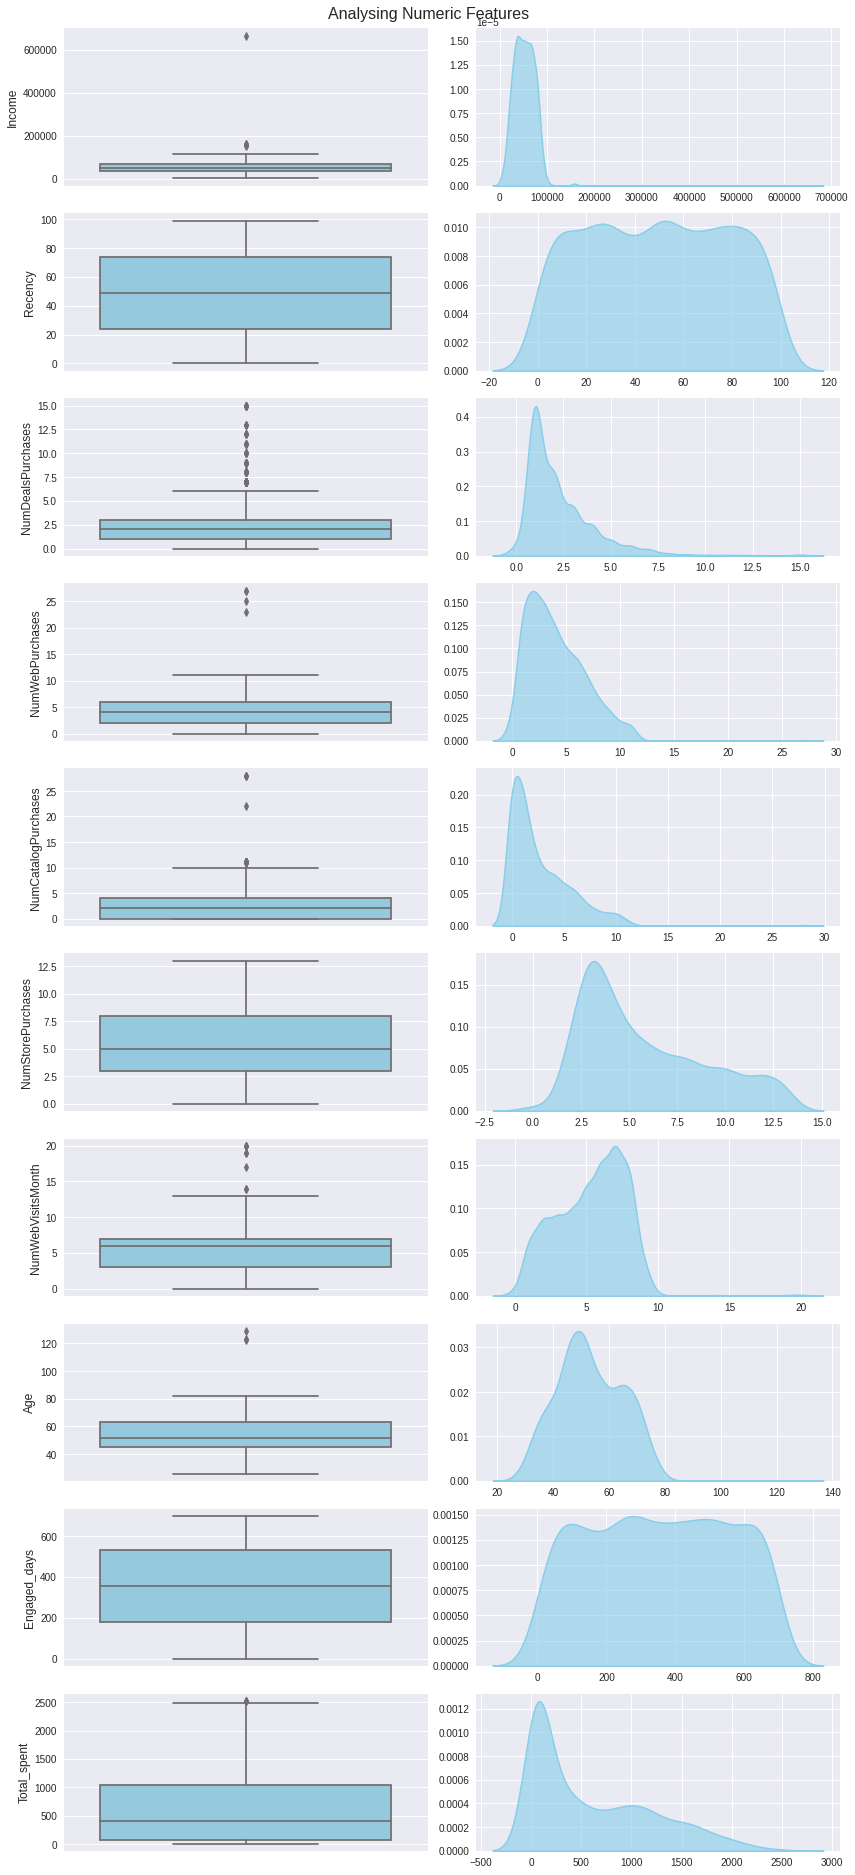

In [31]:
#checking for outlier
numeric_var = df.select_dtypes(['int','float']).columns
plt.style.use('seaborn')
fig, axis = plt.subplots(len(numeric_var), 2, figsize = (12, 26))
for i, num_var in enumerate(numeric_var):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = df, ax = axis[i][0], color = 'skyblue')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = df, ax = axis[i][1], color = 'skyblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

#Removing the crazy rich which have high income and person who age more than 100 because it will form its own clustering including only itself

In [32]:
# Removing outliers
df = df[(df['Income']<600000)]
df = df[(df['Age']<100)]

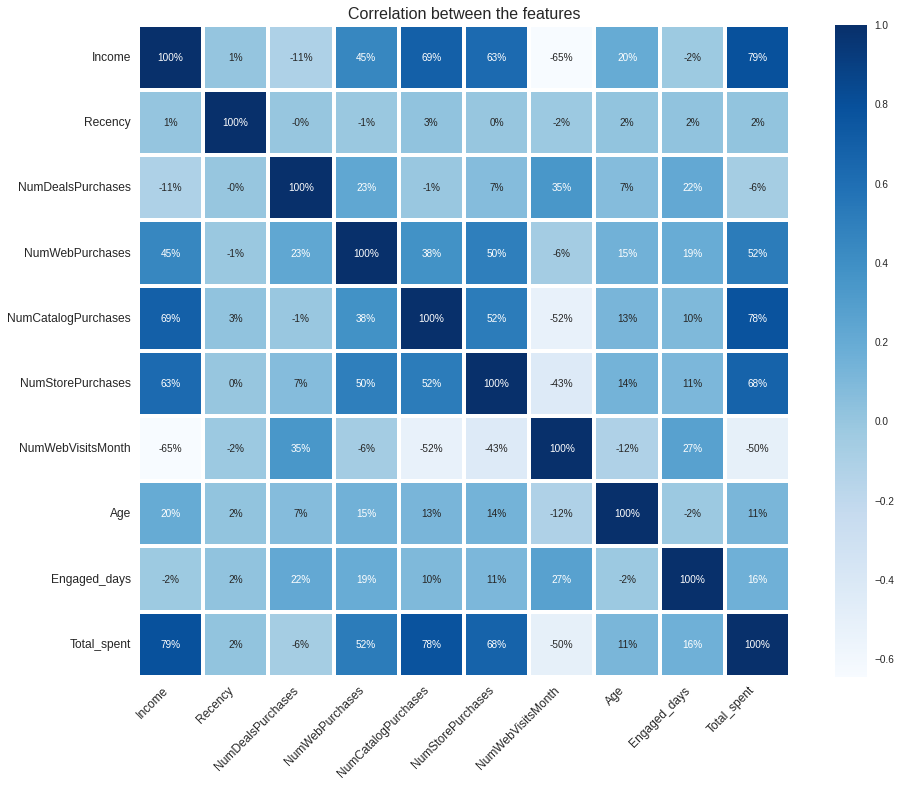

In [33]:
# Correlation between numeric variables
fig=plt.figure(figsize=(16,12))
axis=sns.heatmap(df[numeric_var].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16, y=1.05);
axis.set_xticklabels(numeric_var, fontsize=12, rotation = 45, ha="right")
axis.set_yticklabels(numeric_var, fontsize=12, rotation= 0);

In [35]:
df.head(3)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_Children,Engaged_days,Total_spent,Promo_Accepted
0,PG,Single,58138.0,58,3,8,10,4,7,65,0,663,1617,1
1,PG,Single,46344.0,38,2,1,1,2,5,68,2,113,27,0
2,PG,relationship,71613.0,26,1,8,2,10,4,57,0,312,776,0


<Figure size 864x576 with 0 Axes>

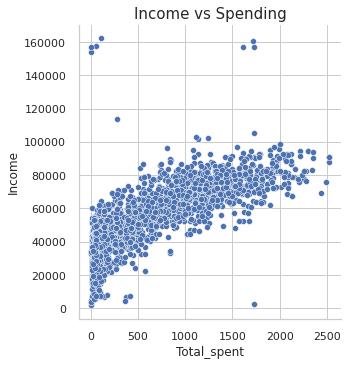

In [46]:
sns.set_theme(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.relplot(x=df["Total_spent"], y=df["Income"],  palette= 'flare')
plt.title("Income vs Spending", size=15)
plt.show()

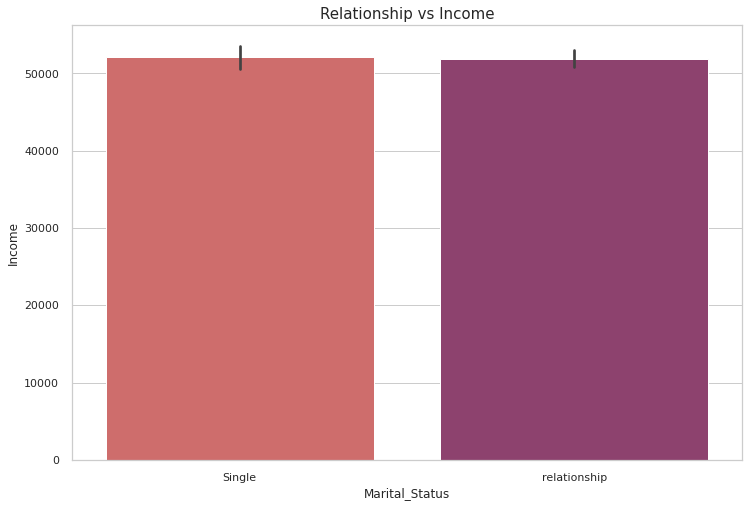

In [47]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Marital_Status"], y=df["Income"], palette= 'flare')
plt.title("Relationship vs Income", size=15)
plt.show()

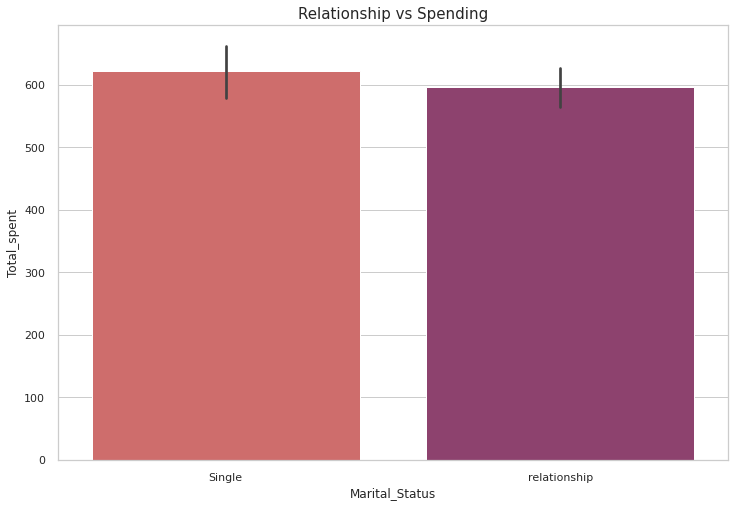

In [48]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Marital_Status"], y=df["Total_spent"], palette= 'flare')
plt.title("Relationship vs Spending", size=15)
plt.show()

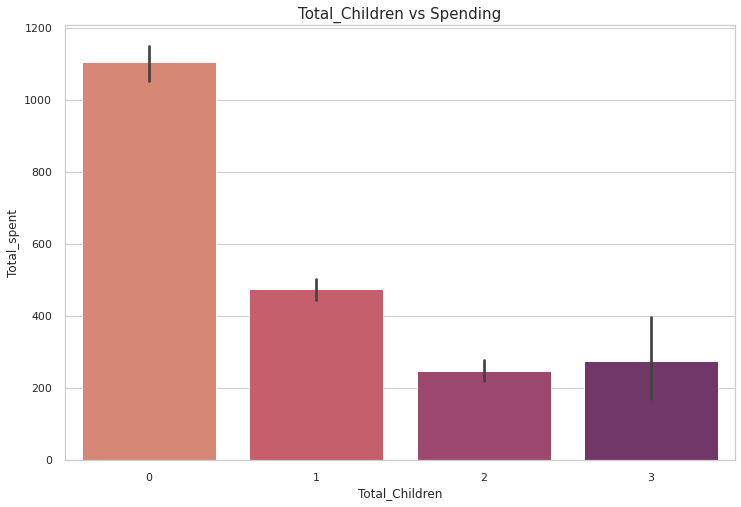

In [49]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Total_Children"], y=df["Total_spent"], palette= 'flare')
plt.title("Total_Children vs Spending", size=15)
plt.show()

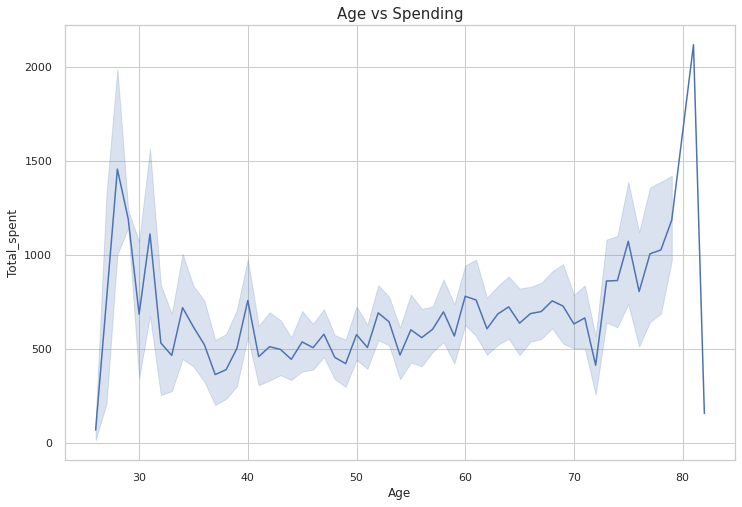

In [44]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.lineplot(x=df["Age"], y=df["Total_spent"], palette= 'flare')
plt.title("Age vs Spending", size=15)
plt.show()

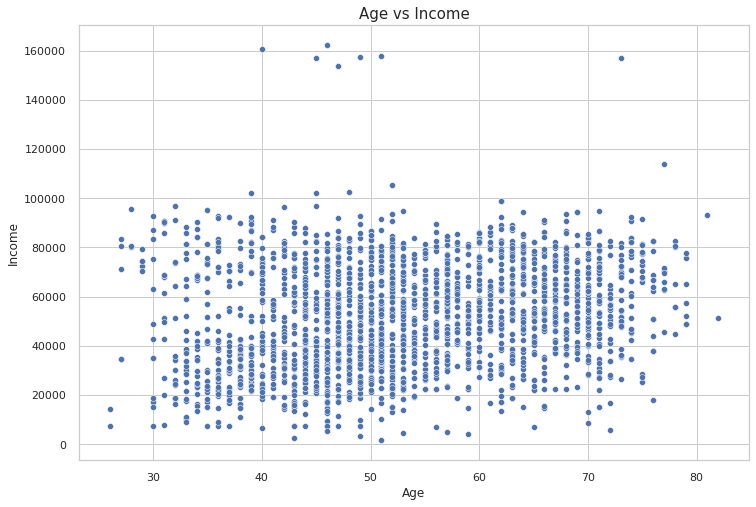

In [43]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["Age"], y=df["Income"], palette= 'flare')
plt.title("Age vs Income", size=15)
plt.show()

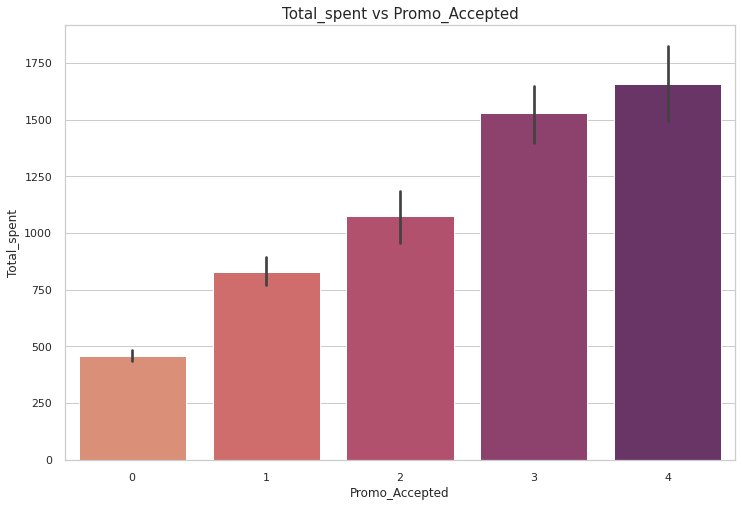

In [41]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Promo_Accepted"], y=df["Total_spent"], palette= 'flare')
plt.title("Total_spent vs Promo_Accepted", size=15)
plt.show()

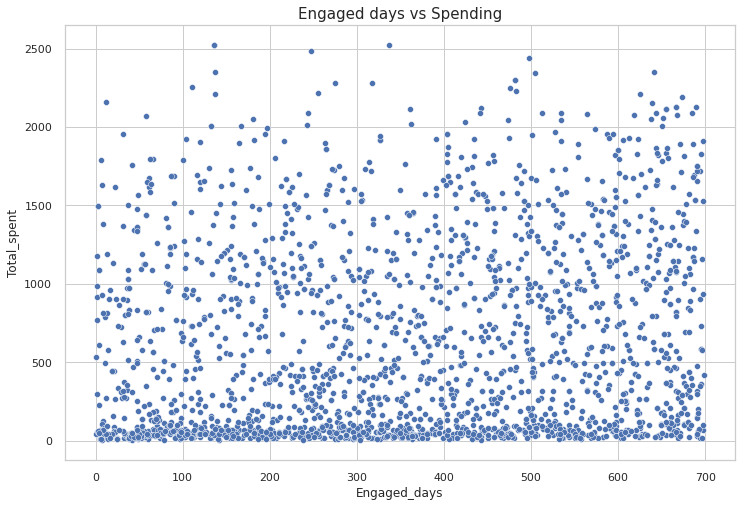

In [40]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["Engaged_days"], y=df["Total_spent"], palette= 'flare')
plt.title("Engaged days vs Spending", size=15)
plt.show()

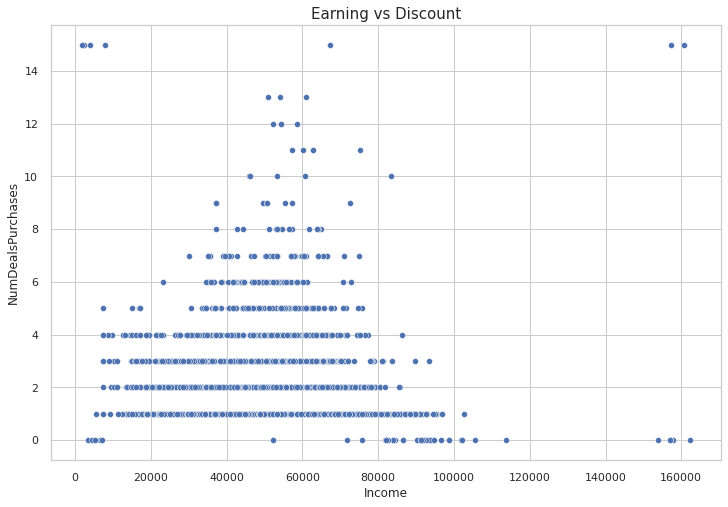

In [39]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Income'], y=df["NumDealsPurchases"], palette= 'flare')
plt.title("Earning vs Discount", size=15)
plt.show()

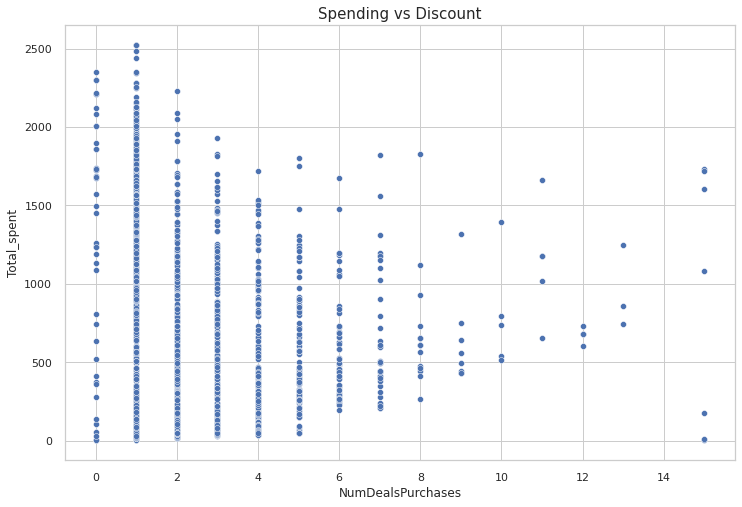

In [38]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['NumDealsPurchases'], y=df["Total_spent"], palette= 'flare') 
plt.title("Spending vs Discount", size=15)
plt.show()

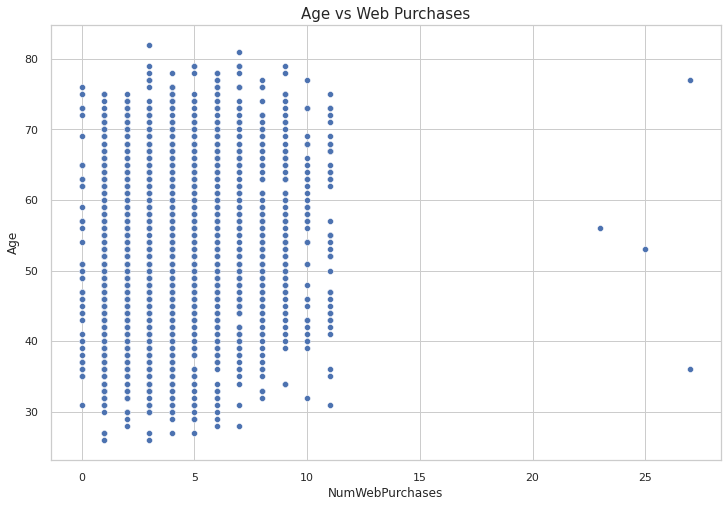

In [37]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["NumWebPurchases"], y=df["Age"], palette= 'flare')
plt.title("Age vs Web Purchases", size=15)
plt.show()

#Data Preprosessing

In [50]:
df.shape

(2236, 14)

In [51]:
X = df.copy()

In [52]:
from sklearn.preprocessing import LabelEncoder

#Select only categorical variables 
cat_variables = [i for i in X.columns if X.dtypes[i] == 'object']

# Import Labelencoder in LE
LE = LabelEncoder()

for cat in cat_variables : 
    X[cat] = X[[cat]].apply(LE.fit_transform)
    

In [53]:
from sklearn.preprocessing import StandardScaler 

# Define the standard scaler : 
scaler = StandardScaler() 


df_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)


In [54]:
X2 = df_scaled
X2.head(5)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_Children,Engaged_days,Total_spent,Promo_Accepted
0,-0.157315,-1.347635,0.288513,0.306856,0.348738,1.407639,2.509801,-0.552429,0.692865,1.016868,-1.264308,1.529793,1.680176,0.666581
1,-0.157315,-1.347635,-0.262438,-0.383971,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,1.273264,1.395139,-1.191143,-0.962202,-0.510730
2,-0.157315,0.742041,0.917992,-0.798467,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.333146,-1.264308,-0.206659,0.282541,-0.510730
3,-0.157315,0.742041,-1.182621,-0.798467,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-1.290693,0.065416,-1.062517,-0.918994,-0.510730
4,-0.157315,0.742041,0.295754,1.550344,1.383614,0.328256,0.115201,0.062879,-0.131421,-1.034298,0.065416,-0.953679,-0.305762,-0.510730


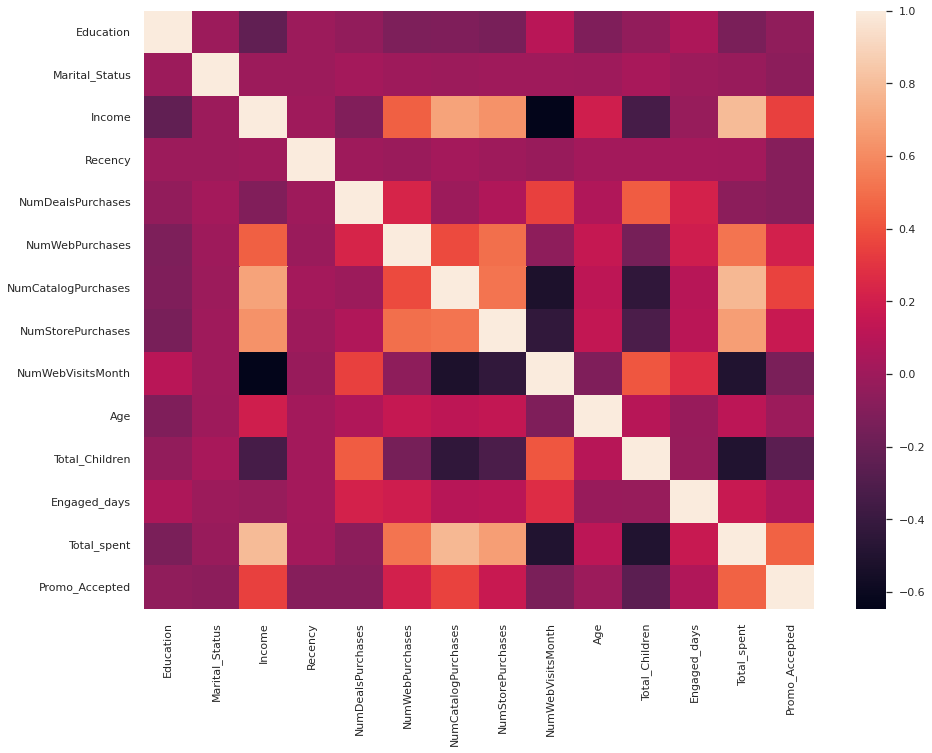

In [55]:
# calculate the correlation matrix
corr = X2.corr()

# plot the heatmap
plt.figure(figsize =(15,11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



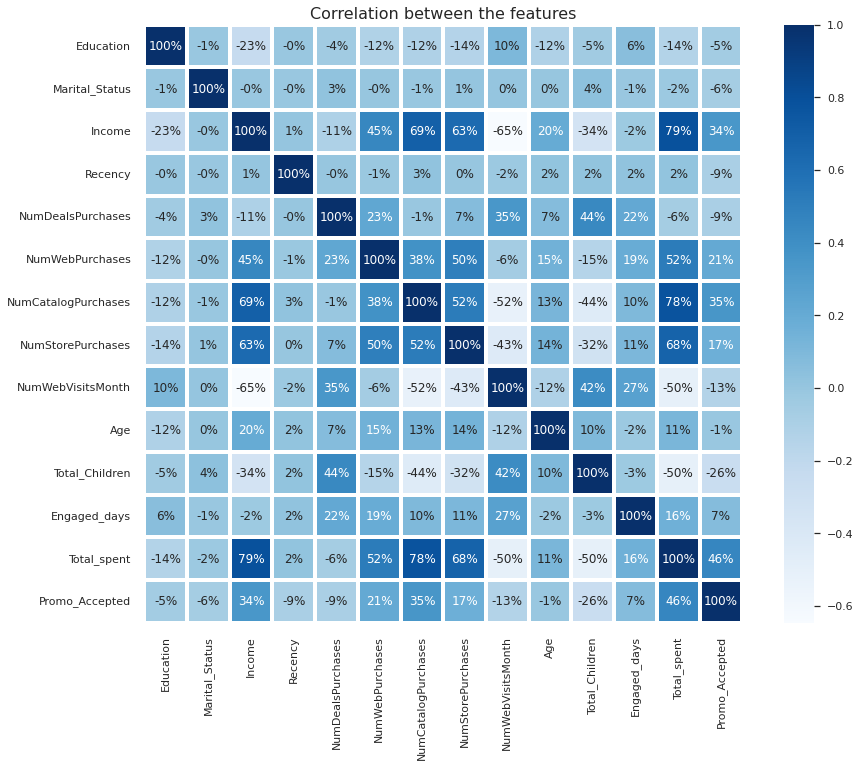

In [56]:
plt.figure(figsize =(15,11))
axis=sns.heatmap(corr, annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")
axis.set_title('Correlation between the features', fontsize=16, y=1.05);

In [58]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   float64
 1   Marital_Status       2236 non-null   float64
 2   Income               2236 non-null   float64
 3   Recency              2236 non-null   float64
 4   NumDealsPurchases    2236 non-null   float64
 5   NumWebPurchases      2236 non-null   float64
 6   NumCatalogPurchases  2236 non-null   float64
 7   NumStorePurchases    2236 non-null   float64
 8   NumWebVisitsMonth    2236 non-null   float64
 9   Age                  2236 non-null   float64
 10  Total_Children       2236 non-null   float64
 11  Engaged_days         2236 non-null   float64
 12  Total_spent          2236 non-null   float64
 13  Promo_Accepted       2236 non-null   float64
dtypes: float64(14)
memory usage: 244.7 KB


# PCA 1 metode 1

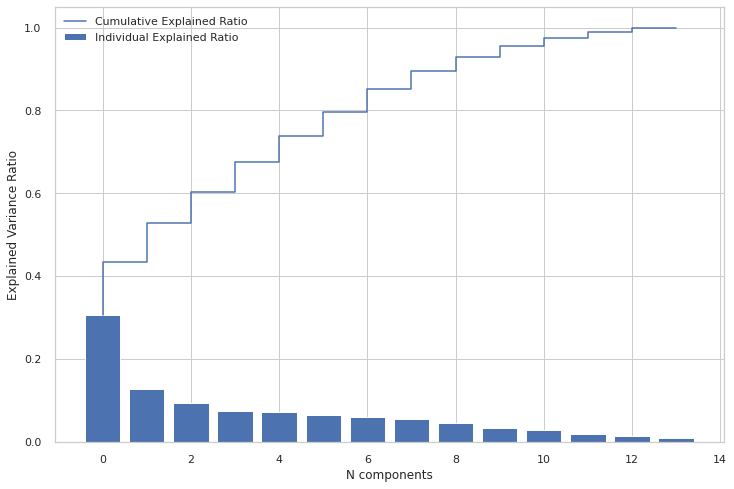

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X2)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

In [60]:
pca = PCA(n_components = 3)
pca.fit(X2)


X_pca = pd.DataFrame(pca.transform(X2), columns=["col1", "col2", "col3"])

In [61]:
# eigenvector per each PC
variance_ratio = {}

for i in range(1, len(X2.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(X2)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()


variance_ratio

{'n_1': 0.3070509915973696,
 'n_10': 0.9284751972257599,
 'n_11': 0.956591808351761,
 'n_12': 0.9761570556824029,
 'n_13': 0.9905943061151029,
 'n_14': 1.0000000000000002,
 'n_2': 0.4351344628608098,
 'n_3': 0.5283118412577119,
 'n_4': 0.6029658151395629,
 'n_5': 0.6746967840895781,
 'n_6': 0.7386586757884209,
 'n_7': 0.7974192467420608,
 'n_8': 0.8518681682130633,
 'n_9': 0.8962594118627326}

In [62]:
variance_ratio

{'n_1': 0.3070509915973696,
 'n_10': 0.9284751972257599,
 'n_11': 0.956591808351761,
 'n_12': 0.9761570556824029,
 'n_13': 0.9905943061151029,
 'n_14': 1.0000000000000002,
 'n_2': 0.4351344628608098,
 'n_3': 0.5283118412577119,
 'n_4': 0.6029658151395629,
 'n_5': 0.6746967840895781,
 'n_6': 0.7386586757884209,
 'n_7': 0.7974192467420608,
 'n_8': 0.8518681682130633,
 'n_9': 0.8962594118627326}

In [63]:
# eigenvector per each PC
data_pca5 = pd.DataFrame(pca.components_[0:3],
                         columns=X2.columns,
                         index = ['PC1','PC2','PC3']).T

data_pca5

,PC1,PC2,PC3
Education,-0.099747,-0.112570,0.435022
Marital_Status,-0.012223,0.034858,-0.139832
Income,0.426418,0.001013,-0.161458
Recency,0.001333,0.012148,-0.128589
NumDealsPurchases,-0.068998,0.601490,-0.075550
NumWebPurchases,0.266951,0.401553,0.043107
NumCatalogPurchases,0.402413,0.031780,0.041316
NumStorePurchases,0.364358,0.163248,-0.063452
NumWebVisitsMonth,-0.321536,0.356342,0.254812
Age,0.088921,0.169818,-0.480973


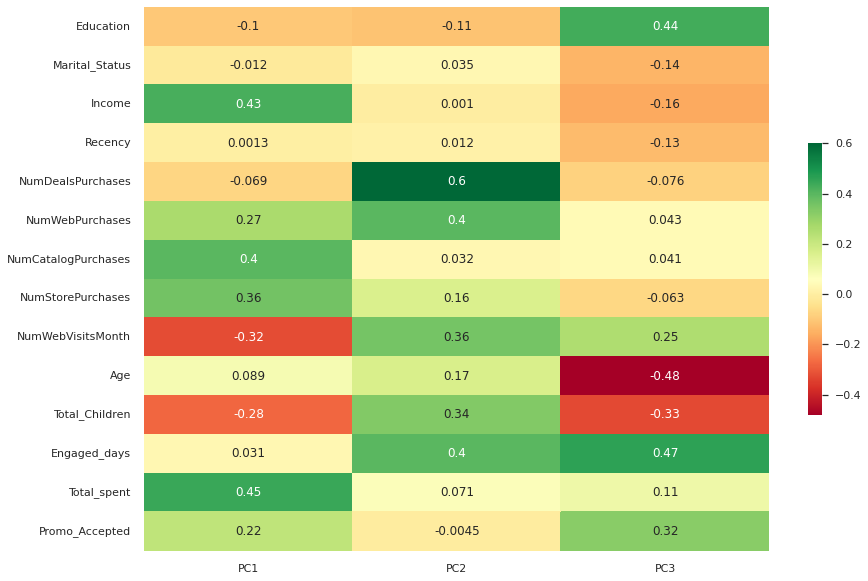

In [64]:
# heatmap for each loading(value of the elements of eigenvector against each principal component.)

plt.figure(figsize=(14, 10))
sns.heatmap(data_pca5,
            annot=True,
            cmap='RdYlGn',
            cbar_kws={'shrink' : 0.5}           
           )


TypeError: ignored

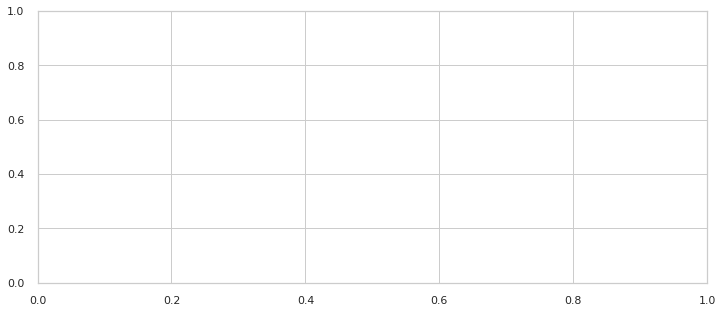

In [65]:
# eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(variance_ratio.keys(), eigen_value)
plt.ylim(0, 10, 1)
plt.axhline(1, color = 'red', ls = '--')
plt.title('Elbow Point')

plt.show()

In [66]:
eigen_value

array([4.30063724, 1.79397092, 1.30506695, 1.04562327, 1.00468289,
       0.89586714, 0.82301607, 0.76262597, 0.62175548, 0.45122279,
       0.39380868, 0.27403602, 0.20221194, 0.13173863])

In [67]:
eigen_value[0] / eigen_value.sum()

0.30705099159736965

In [68]:
print(f'the number of eigenvalue greater than one: {len(eigen_value[eigen_value > 1])}')

the number of eigenvalue greater than one: 5


TypeError: ignored

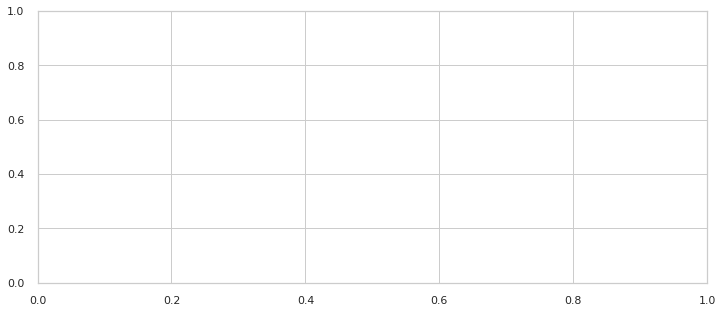

In [69]:
plt.figure(figsize = (12, 5))

plt.plot(variance_ratio.keys(), variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--', lw = 1)
plt.axhline(0.9, color = 'red', ls = '--', lw = 1.5)
plt.title("Variance Ratio")

plt.show()

In [71]:
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

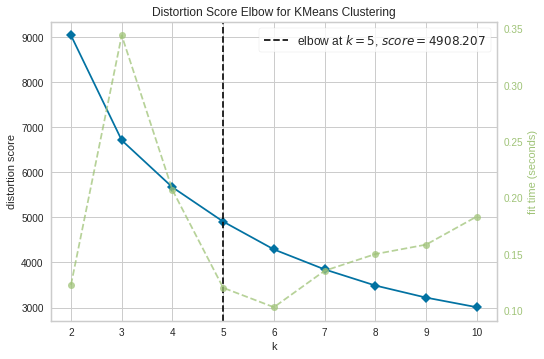

In [72]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

In [73]:
#Silhoutte to get best number for K Means
from sklearn.metrics import silhouette_score

for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(X_pca)
    preds = clusterer.predict(X_pca)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X_pca, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

    #best cluster 3

For n_clusters = 2. The average silhouette_score is : 0.2812102755581646
For n_clusters = 3. The average silhouette_score is : 0.30293312628566066
For n_clusters = 4. The average silhouette_score is : 0.2983558272493851
For n_clusters = 5. The average silhouette_score is : 0.2758454069722279


In [74]:
kmeans = KMeans(n_clusters=3, random_state=42)
predictions = kmeans.fit_predict(X_pca)

In [75]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_pca, x="col1", y="col2", z="col3", color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

Total explained variance for the first 3 components is 53,.7%. So, I opt to select the first 7 components because they approximately 80% of the information present in data.

In [76]:
pca = PCA(n_components = 7)
pca.fit(X2)

X_pca2 = pd.DataFrame(pca.transform(X2), columns=["col1", "col2", "col3", "col4",'col5','col6','col7'])

In [77]:
total_var = pca.explained_variance_ratio_.sum() * 100
print("Explained Total Variance:",total_var)

Explained Total Variance: 79.74192467420603


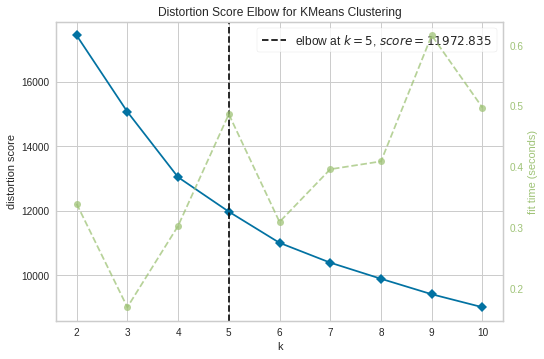

In [78]:
#Here, we use the KElbowVisualizer for 7-dimensional data. 
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca2)
elbow_graph.show()
#It looks like we should selecting 5 clusters.

In [79]:
#Silhoutte to get best number for K Means
from sklearn.metrics import silhouette_score

for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(X_pca2)
    preds = clusterer.predict(X_pca2)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X_pca2, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

    #best cluster 5

For n_clusters = 2. The average silhouette_score is : 0.13110686302377883
For n_clusters = 3. The average silhouette_score is : 0.12485296857278462
For n_clusters = 4. The average silhouette_score is : 0.15322846817278077
For n_clusters = 5. The average silhouette_score is : 0.1593956244610778


In [82]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_pca2, x="col1", y="col2", z="col3", color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

CPU times: user 745 ms, sys: 310 ms, total: 1.06 s
Wall time: 728 ms


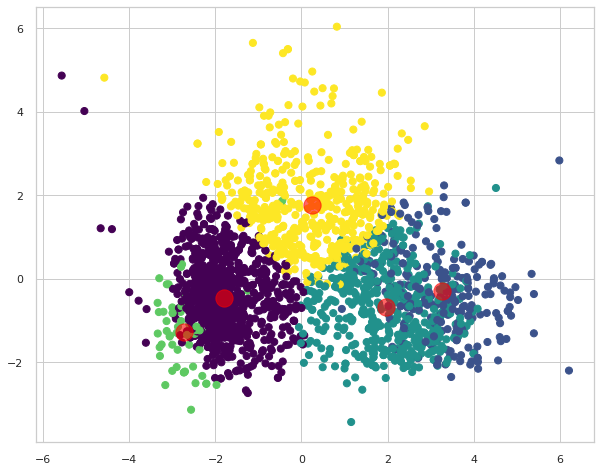

In [103]:
#kmeans cluster on 2d plot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 5
sklearn_pca = PCA(n_components = 7)
Y_sklearn = sklearn_pca.fit_transform(df_scaled)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=150, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=df.assign(K_Cluster = prediction)
targets = [0, 1, 2,3,4]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

In [84]:
kmeans = KMeans(n_clusters=5, random_state=42)
predictions = kmeans.fit_predict(X_pca2)

df["Clusters"] = predictions

In [85]:
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3",'Cluster 4']

cluster0_num = df[df["Clusters"]==0].shape[0]
cluster1_num = df[df["Clusters"]==1].shape[0]
cluster2_num = df[df["Clusters"]==2].shape[0]
cluster3_num = df[df["Clusters"]==3].shape[0]
cluster4_num = df[df["Clusters"]==4].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num, cluster4_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters")])
fig.show()

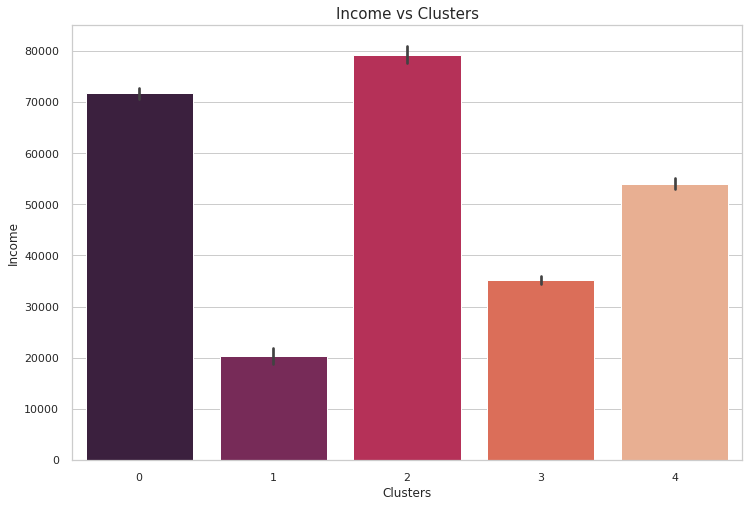

In [88]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"], palette= 'rocket')
plt.title("Income vs Clusters", size=15)
plt.show()

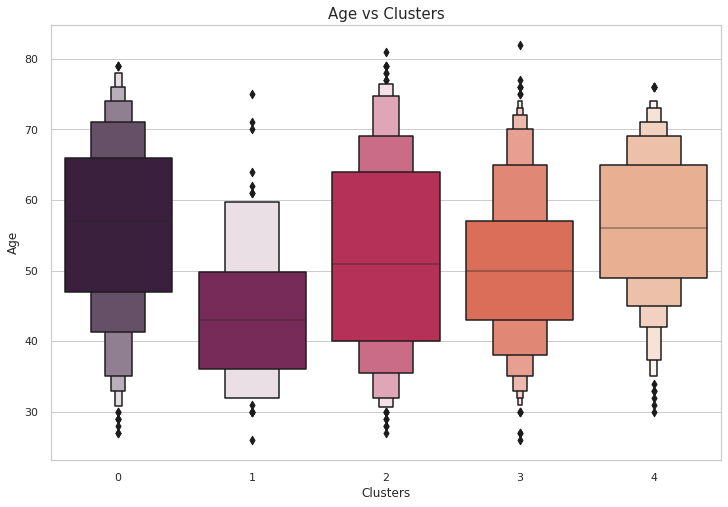

In [89]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Age"], palette='rocket')
plt.title("Age vs Clusters", size=15)
plt.show()

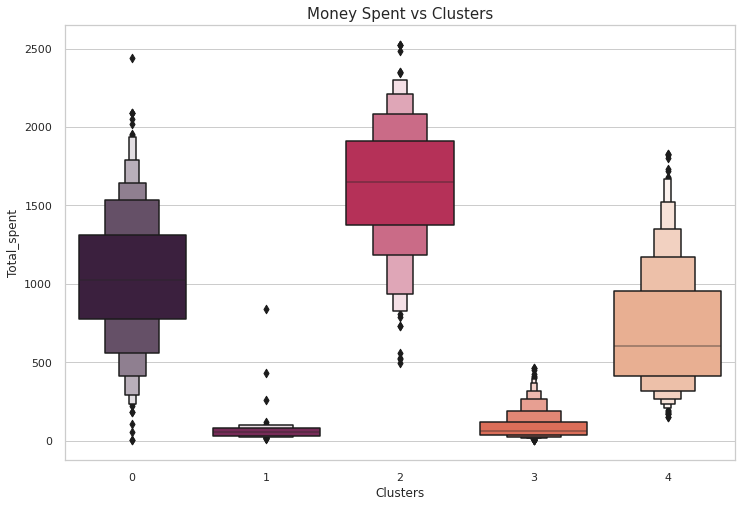

In [90]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Total_spent"], palette='rocket')
plt.title("Money Spent vs Clusters", size=15)
plt.show()

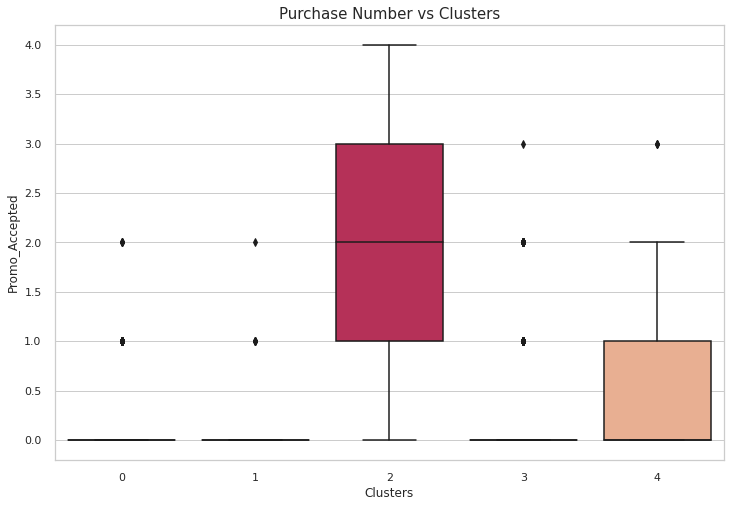

In [91]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["Promo_Accepted"], palette='rocket')
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

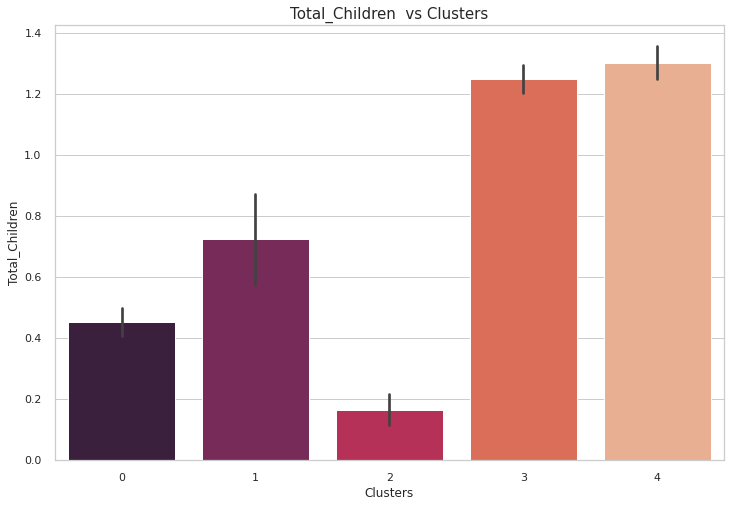

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Total_Children"], palette='rocket')
plt.title("Total_Children  vs Clusters", size=15)
plt.show()

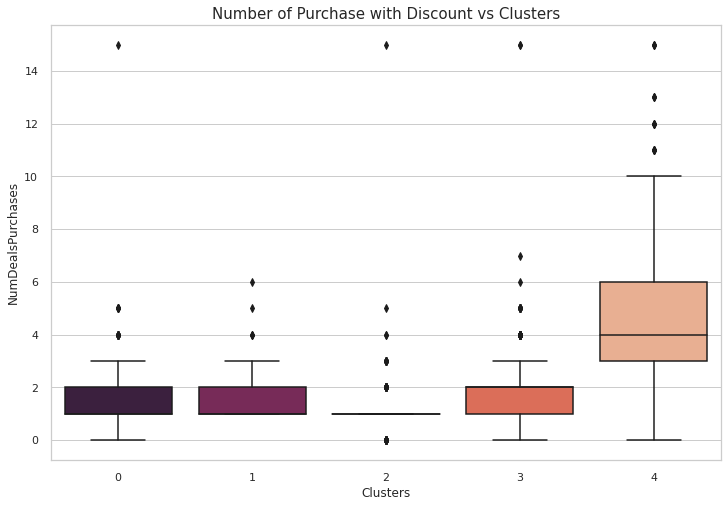

In [93]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["NumDealsPurchases"], palette='rocket')
plt.title("Number of Purchase with Discount vs Clusters", size=15)
plt.show()

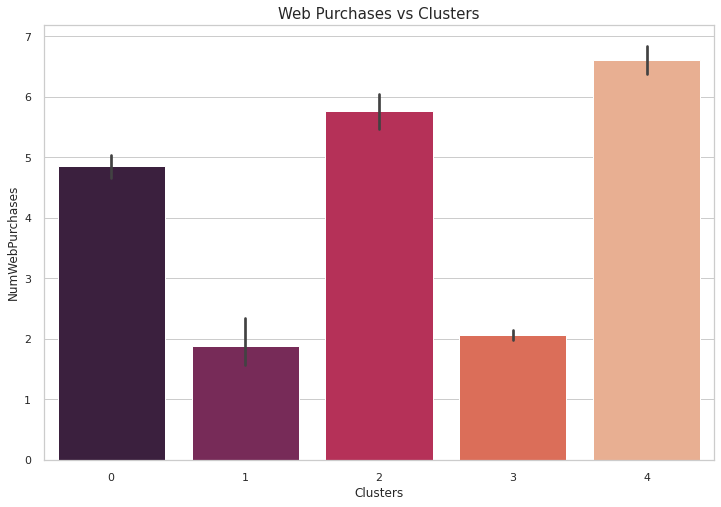

In [94]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["NumWebPurchases"], palette='rocket')
plt.title("Web Purchases vs Clusters", size=15)
plt.show()

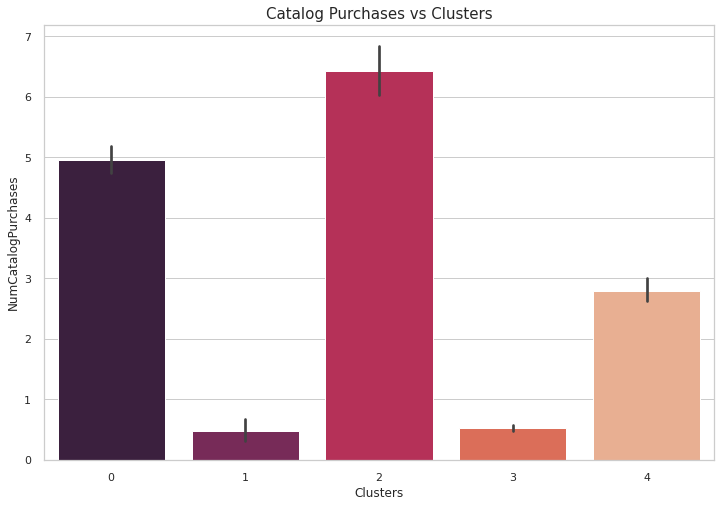

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["NumCatalogPurchases"], palette='rocket')
plt.title("Catalog Purchases vs Clusters", size=15)
plt.show()

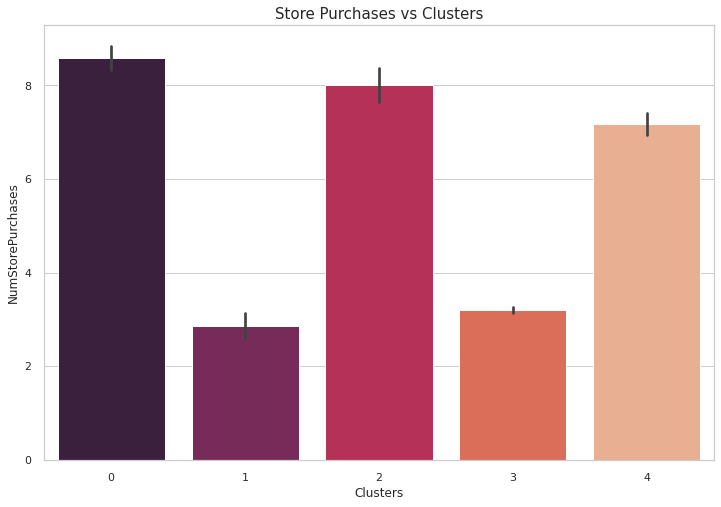

In [96]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["NumStorePurchases"], palette='rocket')
plt.title("Store Purchases vs Clusters", size=15)
plt.show()

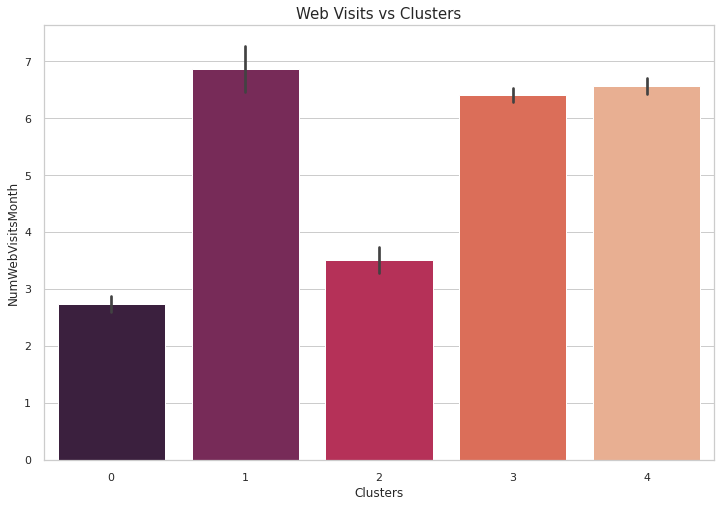

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["NumWebVisitsMonth"], palette='rocket')
plt.title("Web Visits vs Clusters", size=15)
plt.show()

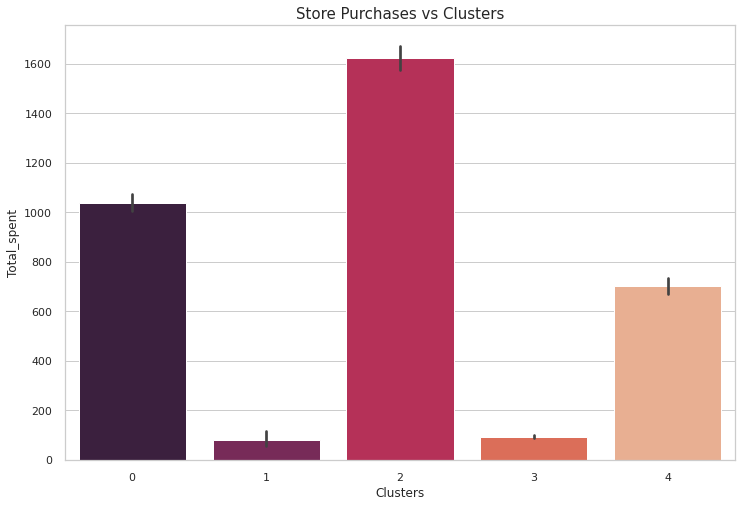

In [113]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Total_spent"], palette='rocket')
plt.title("Store Purchases vs Clusters", size=15)
plt.show()